---
## **HOG Features (12 points)**

In [49]:
import matplotlib.pyplot as plt
from skimage import color, data
from skimage.feature import hog
import cv2

**Compute  HOG features of three images. Visualize the original image, the gradient image, and the HOG feature image**

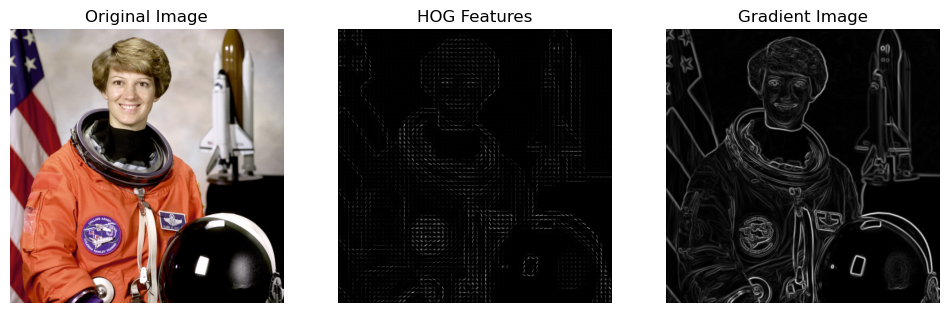

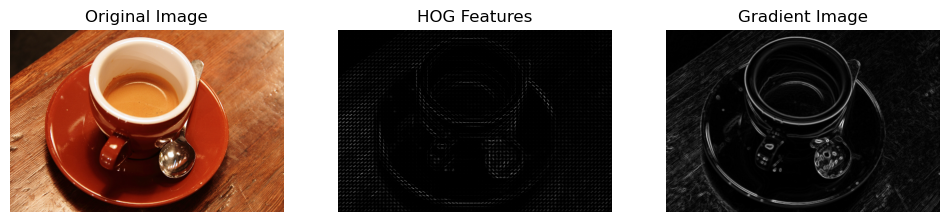

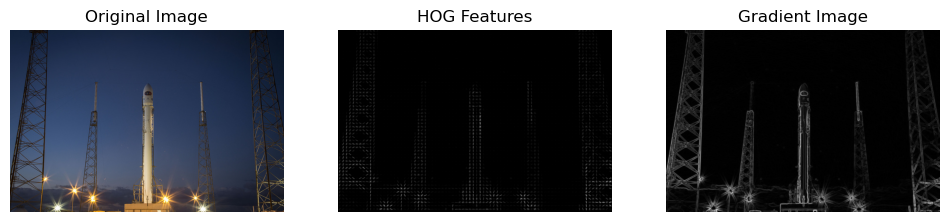

In [53]:
def compute_hog_features(original_image):
    gray_image = color.rgb2gray(original_image)

    # Compute HOG features
    return hog (
        gray_image, 
        orientations=9, 
        pixels_per_cell=(8, 8), 
        cells_per_block=(1, 1), 
        visualize=True, 
    )

def compute_gradient_image(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute gradients
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    
    # Combine gradients
    gradient_image = cv2.magnitude(grad_x, grad_y)
    
    return gradient_image

images = [data.astronaut(), data.coffee(), data.rocket()]

for img in images:
    _, hog_image = compute_hog_features(img)
    gradients = compute_gradient_image(img)
    # Plot the results
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))

    # Plot original image
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Plot HOG image
    axes[1].imshow(hog_image, cmap='grey')
    axes[1].set_title('HOG Features')
    axes[1].axis('off')

    # Plot HOG features
    axes[2].imshow(gradients, cmap='grey')
    axes[2].set_title('Gradient Image')
    axes[2].axis('off')

    plt.show()

**Compare the HOG features extracted from different images**
<br>

Comparing HOG features from all three images it appears that HOG is more prominent in the foreground or those part of the image that is in focus. For all photos the HOG features captures the shape of the most distint visual elements. In the female astronaut photo the contours of HOG resemeble a human being, the space rocket turns into more general vertical shapes. The gradient images are more close in resembles to their original image. Gradient images focus on edge detection and intensity changes, while HOG captures the distribution of these gradients creating compact feature representation for tasks like, emphasizing the orientation and structure rather than just edge detection.

**Discuss the impact of parameters cell size, block size, and the number of bins on the resulting HOG descriptors**
<br>

**Cell size** 
<br>
Cell size is the dimensions of the pixel regions over which gradient histograms are computed. Smaller cell size results in more sensitive features capturing finer details and local variations in the image, while larger cell size focuses more on prominent features. Larger cell size might miss subtle gradients and therefore miss important spatial information.

**Block Size** 
<br>
Smaller block size allows for finer normalization of features and helps emphasizing local changes. Larger block size provides more global normalization across features and can improve robustness against illumination changes. If block size is too large this may blur important local features and reduce the ability to distinguish between classes.

**Number of Bins** 
<br>
Many bins increase allows more precise feature extraction. Fewer bins reduces model complexity and the risk of overfitting and leads to a loss of fine directional information, as it might not accurately capture edge orientation, ultimately leading to reduced discriminative ability.